<a href="https://colab.research.google.com/github/satwika1706/Codsoft_Internship/blob/main/EDA_and_Movie_Rating_(codesoft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cleaning and Imputing the Data

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=df.columns)
result_df

,no of missing values,percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [ ]:
df.dropna(subset=['Rating'],inplace=True)

In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100

result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=df.columns)

result_df

,no of missing values,percentage
Name,0,0.00%
Year,0,0.00%
Duration,2068,26.11%
Genre,102,1.29%
Rating,0,0.00%
Votes,0,0.00%
Director,5,0.06%
Actor 1,125,1.58%
Actor 2,200,2.53%
Actor 3,292,3.69%


Now for other column except genre the missing values are less than 4% so we will drop them

In [ ]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100

result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=df.columns)

result_df

,no of missing values,percentage
Name,0,0.00%
Year,0,0.00%
Duration,1899,25.13%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%
Actor 2,0,0.00%
Actor 3,0,0.00%


In [ ]:
df['Votes']= df['Votes'].str.replace(',','').astype(int)
df['Year']= df['Year'].str.strip('()').astype(int)
df['Duration']=df['Duration'].str.strip(' min')

In [ ]:
df['Duration_copy']=df['Duration']
mask = df['Duration'].isnull()
random_values = np.random.randint(90, 181, size=mask.sum())  # Generate random numbers
df['Duration'][mask] = random_values
org_duration = df.loc[~df['Duration_copy'].isnull(), 'Duration_copy'].astype(int)
df['Duration'] = df['Duration'].astype(int)

<ipython-input-12-17f4fd982a2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][mask] = random_values


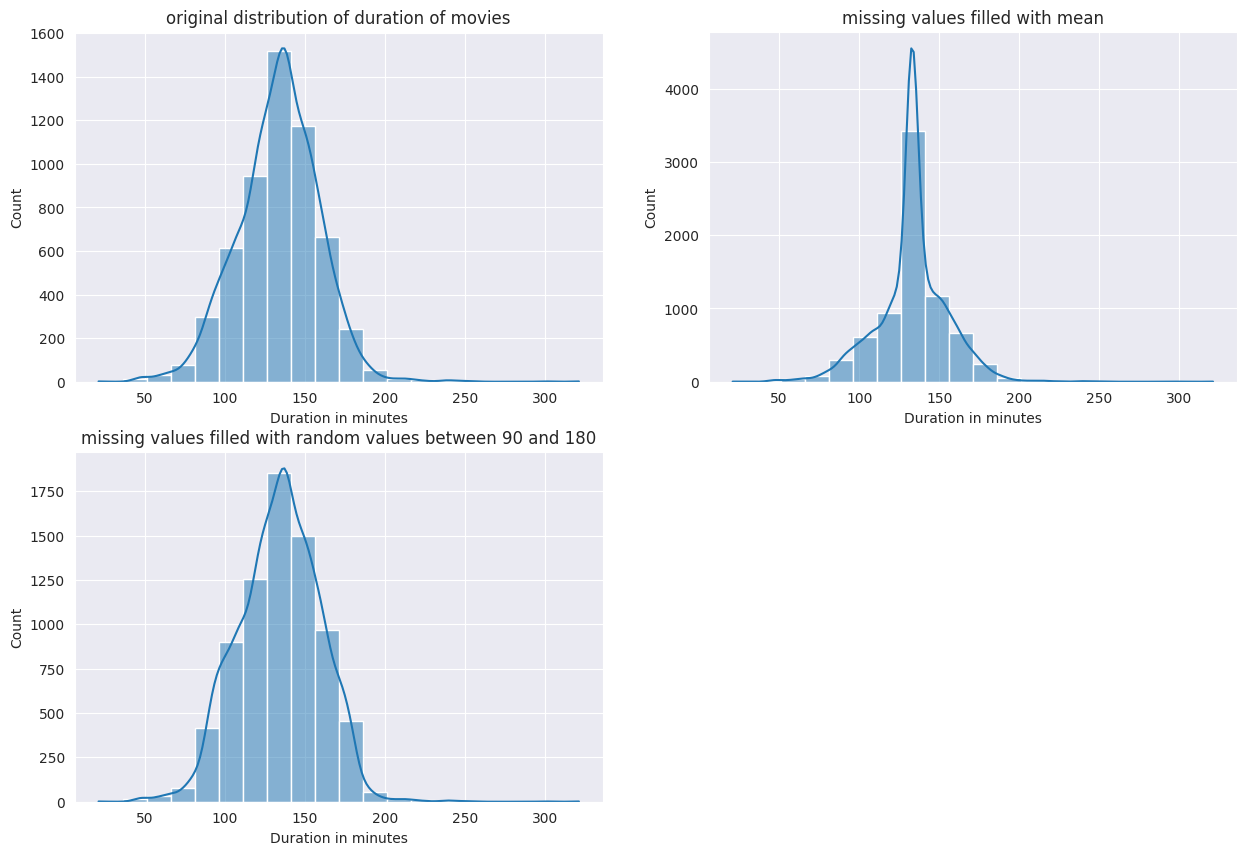

In [ ]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=org_duration,bins=20,kde=True,ax=ax[0][0])
sns.histplot(data=df,x=df['Duration_copy'].fillna(org_duration.mean()).astype(int),bins=20,kde=True,ax=ax[0][1])
sns.histplot(data=df,x=df['Duration'],bins=20,kde=True,ax=ax[1][0])
ax[0][0].set_xlabel('Duration in minutes')
ax[0][1].set_xlabel('Duration in minutes')
ax[1][0].set_xlabel('Duration in minutes')
ax[0][0].set_title('original distribution of duration of movies')
ax[0][1].set_title('missing values filled with mean')
ax[1][0].set_title('missing values filled with random values between 90 and 180')
fig.delaxes(ax[1][1])
plt.show()

In [ ]:
df.drop(columns=['Duration_copy'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   int64  
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 649.5+ KB


EDA

Top 10 rated movies

In [ ]:
top_10_movies = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,108,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


In [ ]:
df.groupby('Year').apply(pd.DataFrame.nlargest, n=1, columns=['Rating'])

,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1917,8146,Lanka Dahan,1917,109,"Adventure, Drama, Fantasy",6.7,22,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
1931,7203,Kalidas,1931,154,"Drama, History, Musical",6.2,12,H.M. Reddy,T.P. Rajalakshmi,P.G. Venkatesan,L.V. Prasad
1932,6073,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1933,851,Alif Laila,1933,158,Fantasy,7.2,37,Balwant Bhatt,Shanti Dave,Bashir Qawal,Zohra
1934,9053,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
...,...,...,...,...,...,...,...,...,...,...,...
2017,11841,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
2018,1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


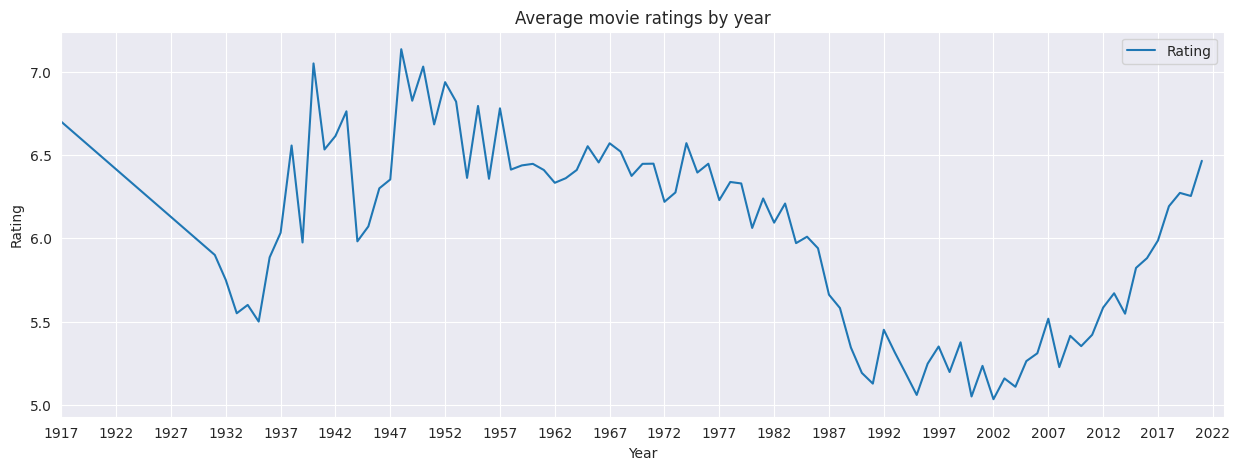

In [ ]:
sns.set_style('darkgrid')
df.groupby('Year')[['Rating']].mean().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average movie ratings by year')
plt.xticks(np.arange(1917,2023,5))
plt.xlim(1917,2023)
plt.show()

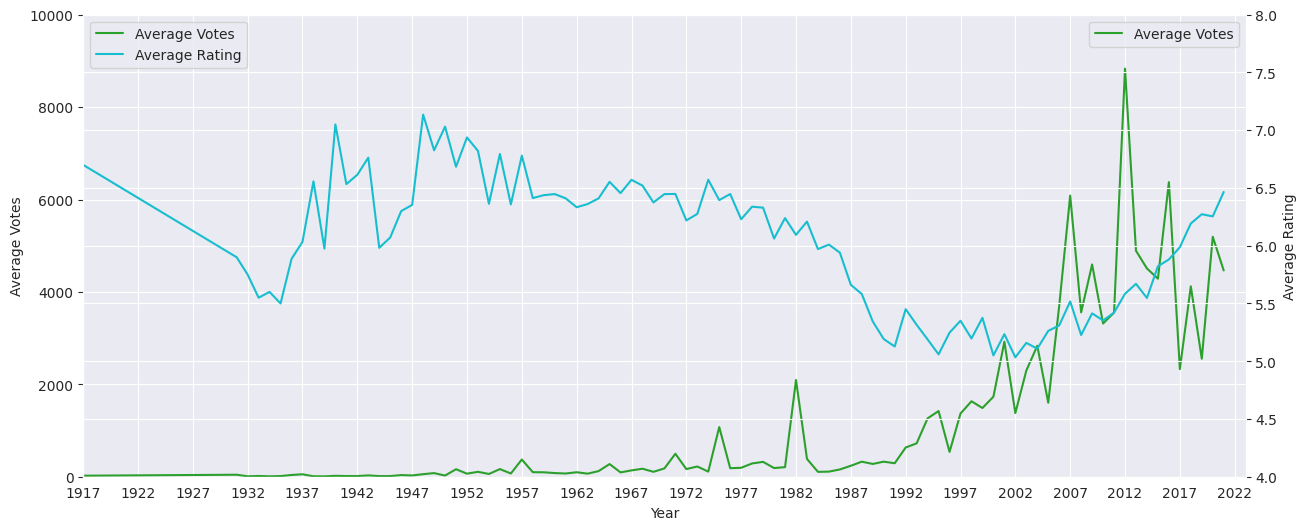

In [ ]:
fig,ax1 = plt.subplots(figsize=(15,6))
sns.lineplot(data=df,x='Year',y='Votes',errorbar=None,ax=ax1,label='Average Votes',color='#2ca02c')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Votes')
ax1.set_xlim(1917,2023)
ax1.set_ylim(0,10000)
ax1.set_xticks(np.arange(1917,2023,5))
ax2 = ax1.twinx()
sns.lineplot(data=df,x='Year',y='Rating',errorbar=None,ax=ax2,color='#17becf',label='Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(4,8)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

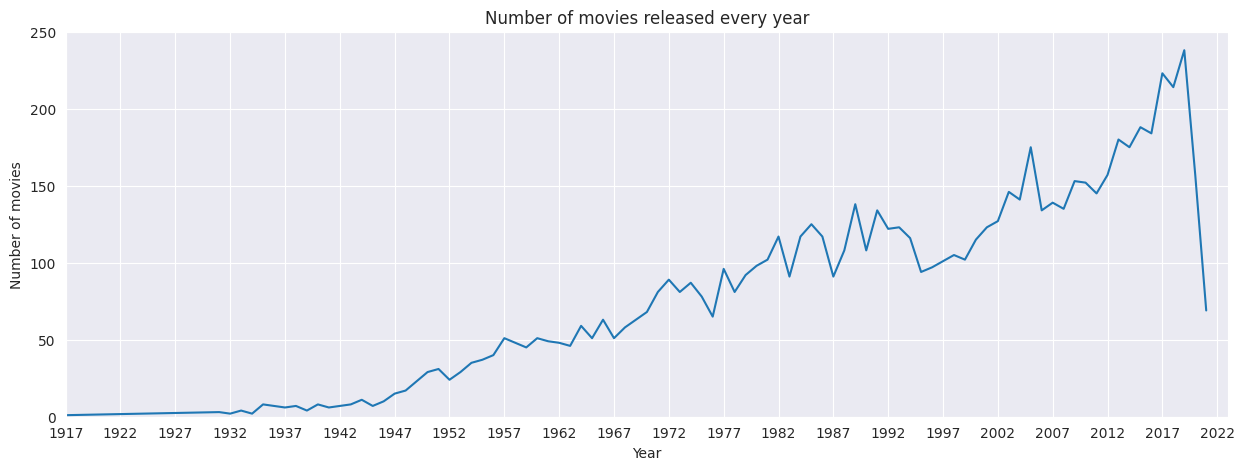

In [ ]:
sns.set_style('darkgrid')
df.groupby(['Year'])['Name'].count().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released every year')
plt.ylim(0,250)
plt.xlim(1917,2023)
plt.xticks(np.arange(1917,2023,5))
plt.show()

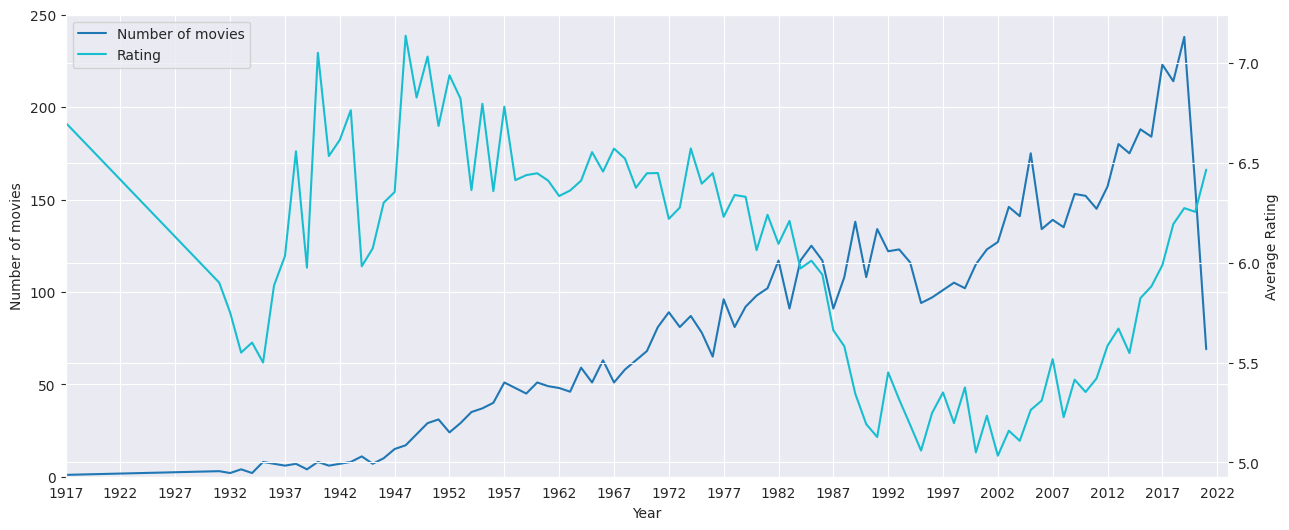

In [ ]:
sns.set_style('darkgrid')
fig,ax1 = plt.subplots(figsize=(15,6))
df.groupby(['Year'])['Name'].count().plot(ax=ax1,label='Number of movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies')
ax1.set_ylim(0,250)
ax1.set_xlim(1917,2023)
ax1.set_xticks(np.arange(1917,2023,5))
ax2=ax1.twinx()
df.groupby('Year')[['Rating']].mean().plot(ax=ax2,color='#17becf',label='Average rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()


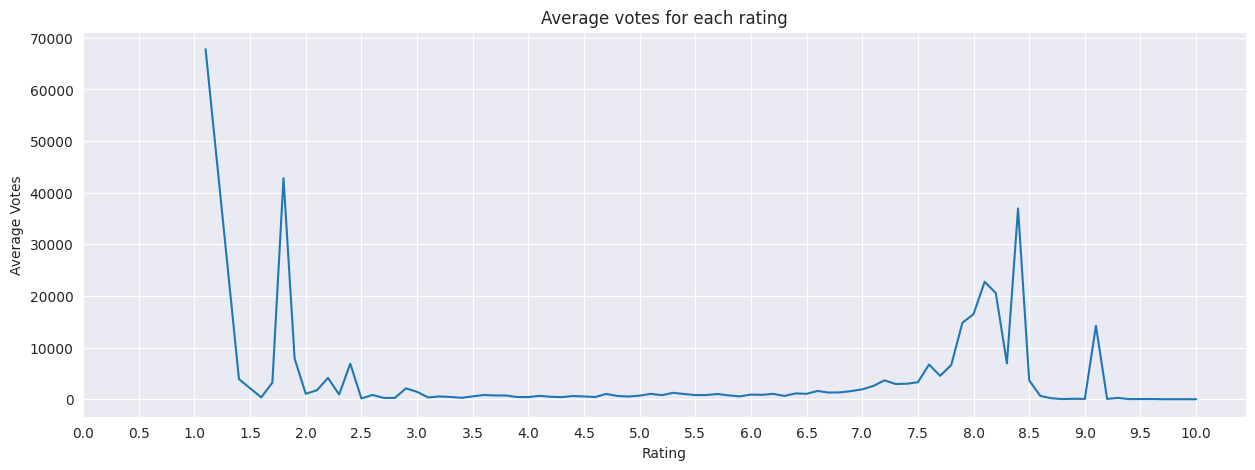

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Rating',y='Votes',errorbar=None)
plt.xlabel('Rating')
plt.ylabel('Average Votes')
plt.xticks(np.arange(0,10.5,0.5))
plt.title('Average votes for each rating')
plt.show()

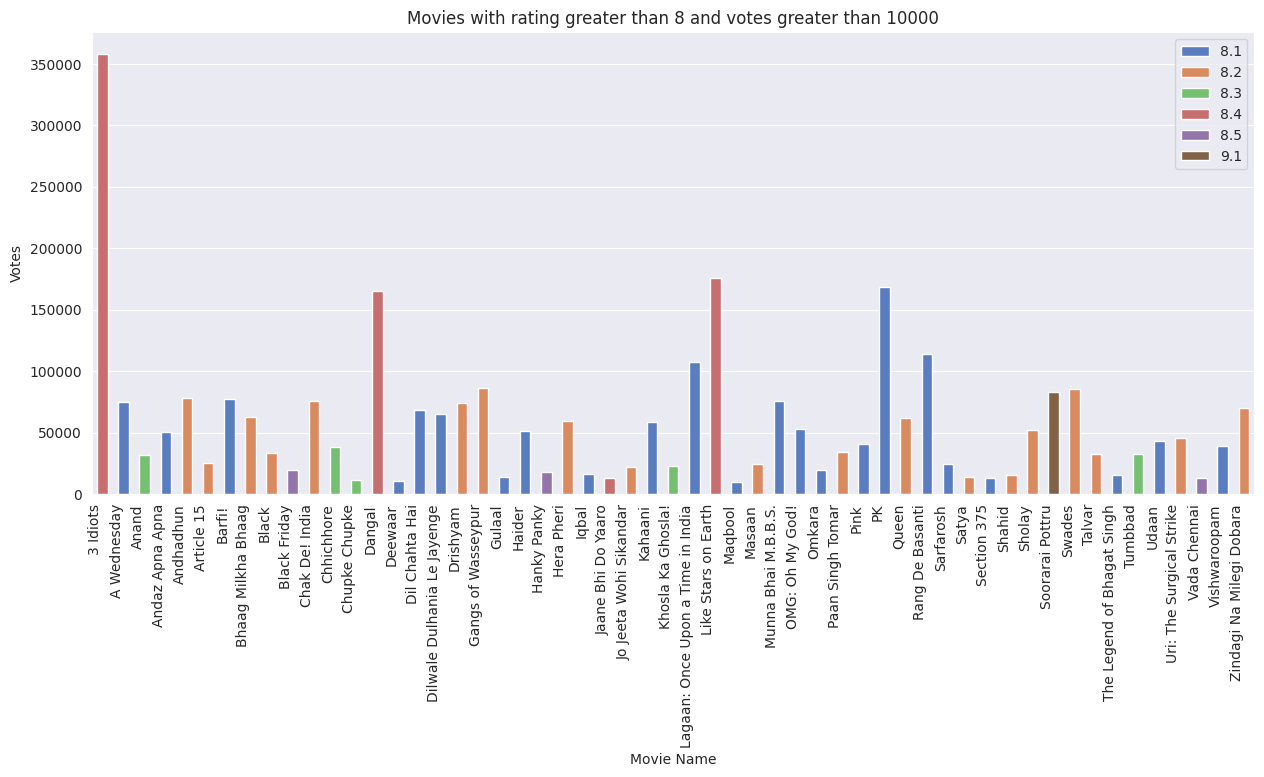

In [ ]:
sns.set_style('darkgrid')
d = df.loc[(df['Rating']>8) & (df['Votes']>10000), ['Rating','Votes','Name']]
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=d,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')
plt.show()

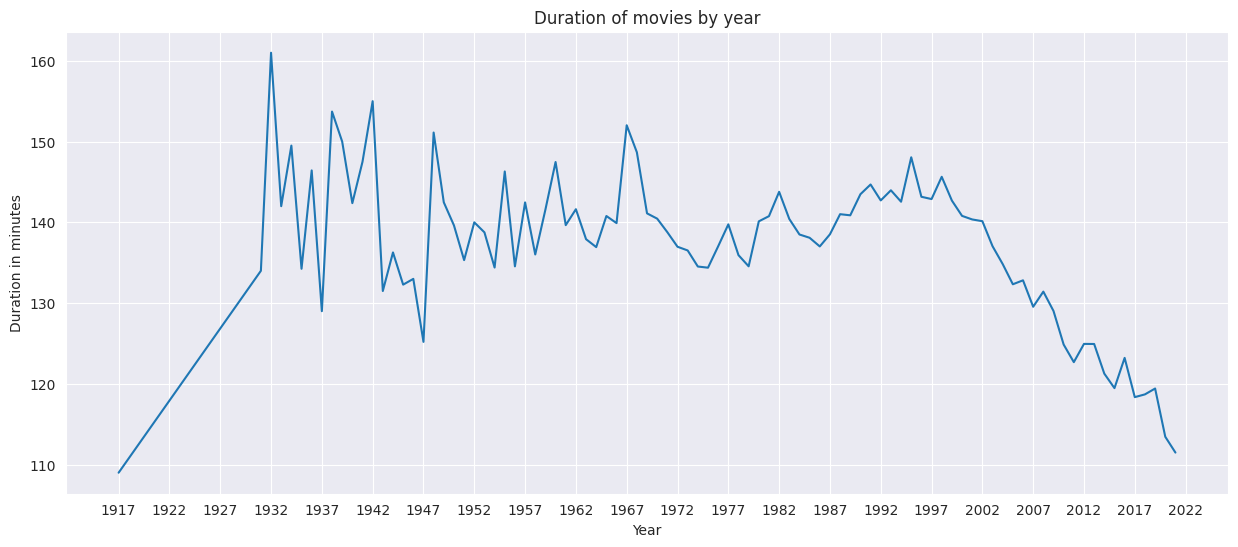

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
sns.lineplot(data=df,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

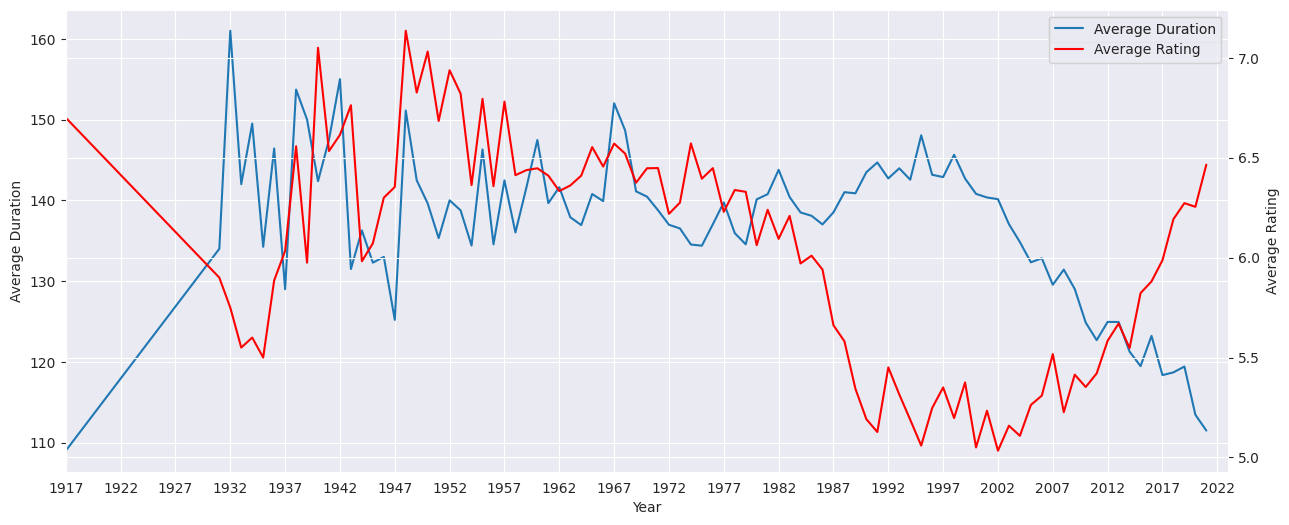

In [ ]:
fig,ax1 = plt.subplots(figsize=(15,6))
sns.lineplot(data=df,x='Year',y='Duration',errorbar=None,ax=ax1,label='Average Duration')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Duration')
ax1.set_xlim(1917,2023)
ax1.set_xticks(np.arange(1917,2023,5))
ax2 = ax1.twinx()
sns.lineplot(data=df,x='Year',y='Rating',errorbar=None,ax=ax2,color='red',label='Average Rating')
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [ ]:
genre = df['Genre']
genre_stack = genre.str.split(',').apply(pd.Series).stack()
genre_stack.index = genre_stack.index.droplevel(-1)
g=[genre.str.split(',').apply(pd.Series)[i].str.strip().value_counts(dropna=False).to_dict() for i in range(3)]
# g_dict = {}
# for dic in g:
#     for k,v in dic.items():
#         if k in g_dict:
#             g_dict[k]+=v
#         else:
#             g_dict[k]=v
# below code does same job as above
g_dict = {k: sum(dic.get(k,0) for dic in g) for dic in g for k in dic}
genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)
# Now for average rating of each genre
# genre_rating = {}
# for i in genres_count.index:
#     genre_rating[i]=df.loc[df['Genre'].str.contains(i),'Rating'].mean().round(1)
genre_rating = {k:df.loc[df['Genre'].str.contains(k),'Rating'].mean().round(1) for k in genres_count.index}
genre_rating = pd.Series(genre_rating).sort_values(ascending=False)
genres_single = pd.concat([genres_count,genre_rating],axis=1).sort_values(by=1,ascending=False).rename(columns={0:'Movie count',1:'Average rating'})
genres_single.sort_values(by='Movie count',ascending=False,inplace=True)

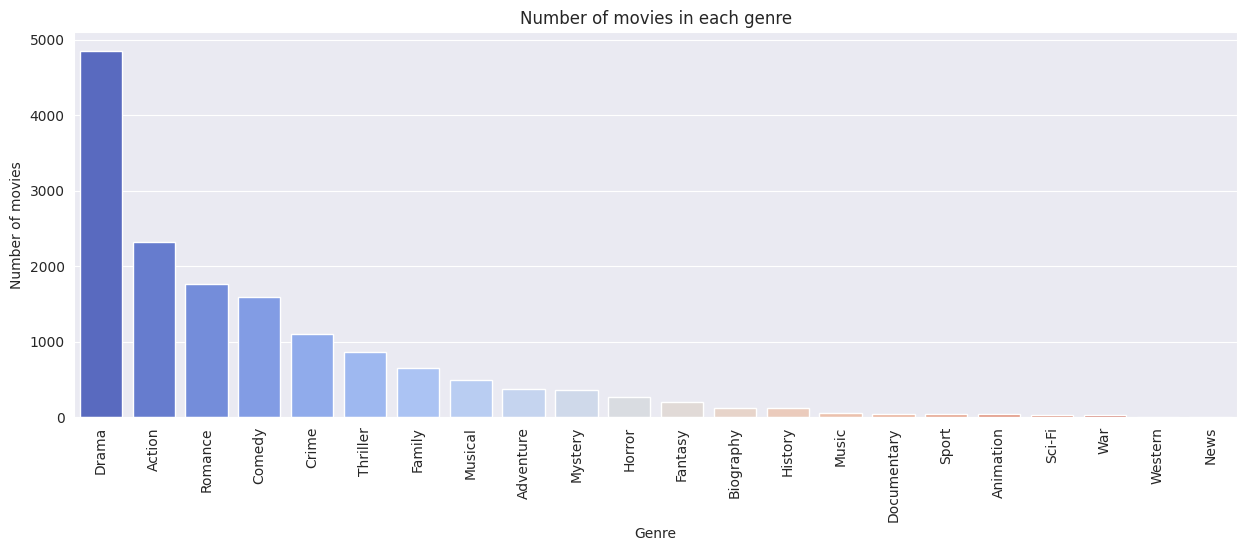

In [ ]:
# genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=genres_single,x=genres_single.index.values,y='Movie count',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.xticks(rotation=90)
plt.show()

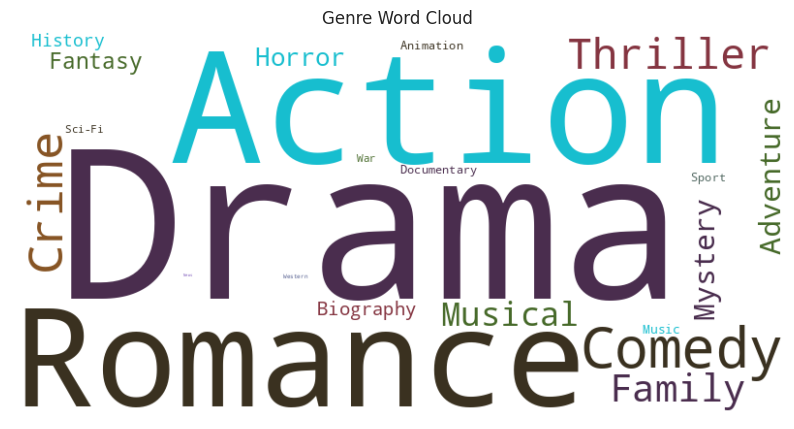

In [ ]:
from wordcloud import WordCloud
from random import choice
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E",'#17becf']
def color_func(word, *args, **kwargs):
    return choice(colors)
wordcloud = WordCloud(width=800, height=400, background_color='white',color_func=color_func).generate_from_frequencies(genres_count)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

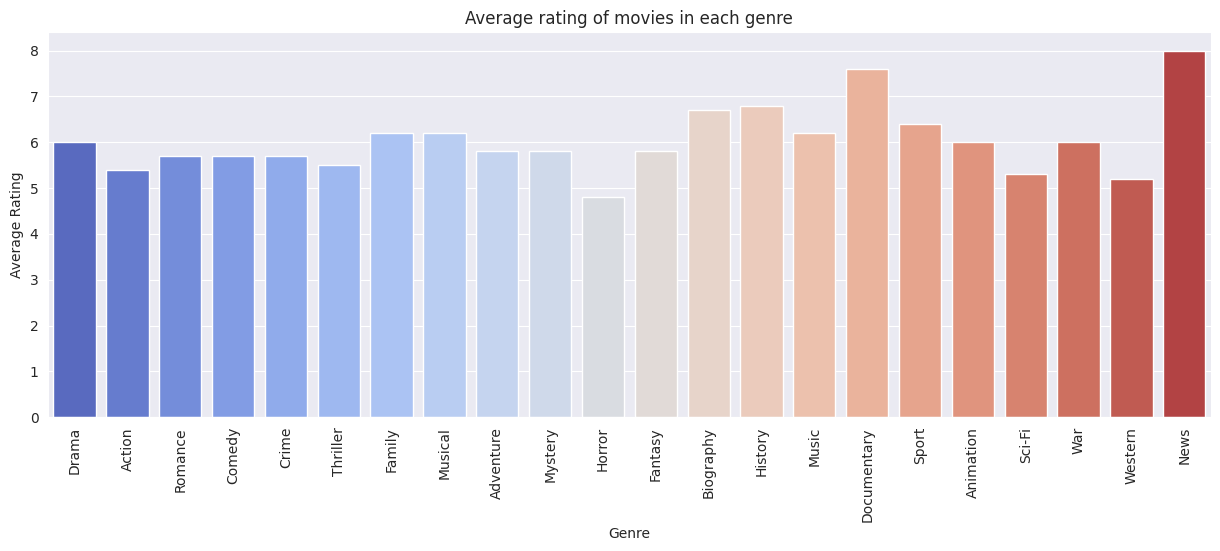

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=genres_single,x=genres_single.index.values,y='Average rating',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)
plt.show()

In [ ]:
genre_df = df.groupby('Genre').agg({'Rating':['mean','count']})
genre_df.reset_index(inplace=True)
genre_df.columns = ['Genre','Average Rating','Movie Count']
genre_df['Average Rating'] = genre_df['Average Rating'].round(1)
genre_df

,Genre,Average Rating,Movie Count
0,Action,5.0,391
1,"Action, Adventure",5.6,24
2,"Action, Adventure, Biography",7.8,1
3,"Action, Adventure, Comedy",5.6,40
4,"Action, Adventure, Crime",5.6,16
...,...,...,...
411,"Thriller, Action",4.3,1
412,"Thriller, Musical, Mystery",7.1,1
413,"Thriller, Mystery",6.5,3
414,"Thriller, Mystery, Family",6.1,1


In [ ]:
genre_dict = dict(zip(genre_df['Genre'],genre_df['Average Rating']))

In [ ]:
directors  = df.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)
directors.head()

,Director,Average Rating,Movie count
1336,Mahesh Bhatt,5.5,45
586,David Dhawan,5.2,43
899,Hrishikesh Mukherjee,7.1,42
2408,Shakti Samanta,6.6,38
1155,Kanti Shah,4.9,37


In [ ]:
directors_dict = dict(zip(directors['Director'],directors['Average Rating']))

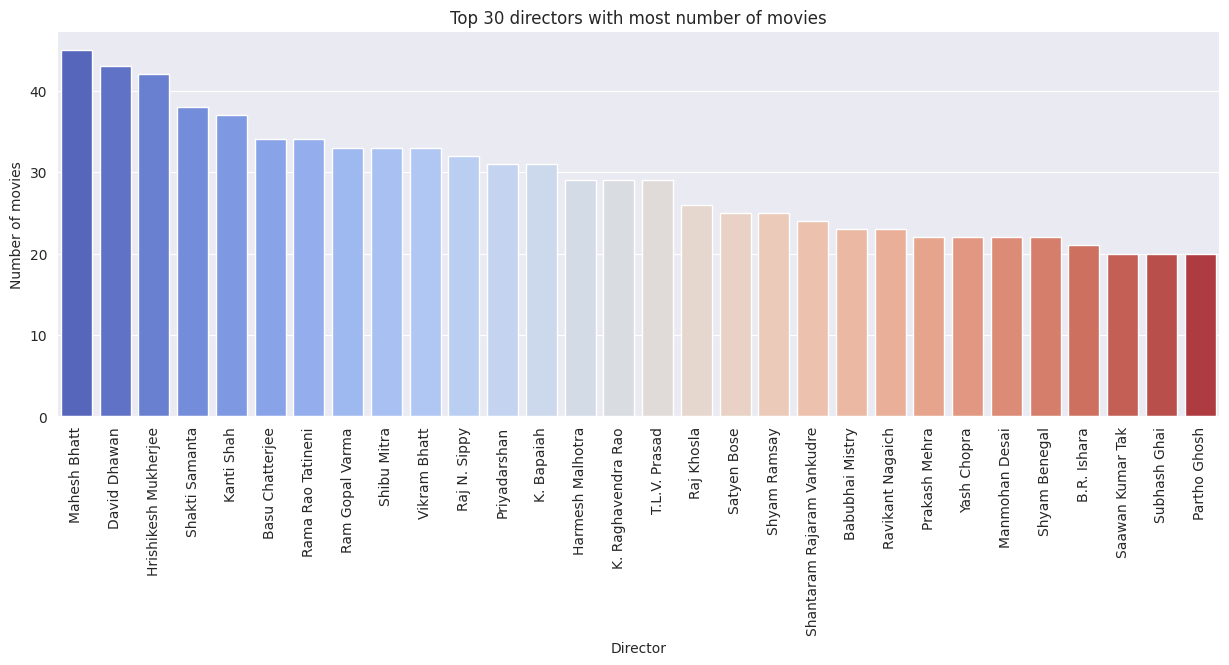

In [ ]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.barplot(data=directors.head(30),x='Director',y='Movie count',palette='coolwarm')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.title('Top 30 directors with most number of movies')
plt.show()

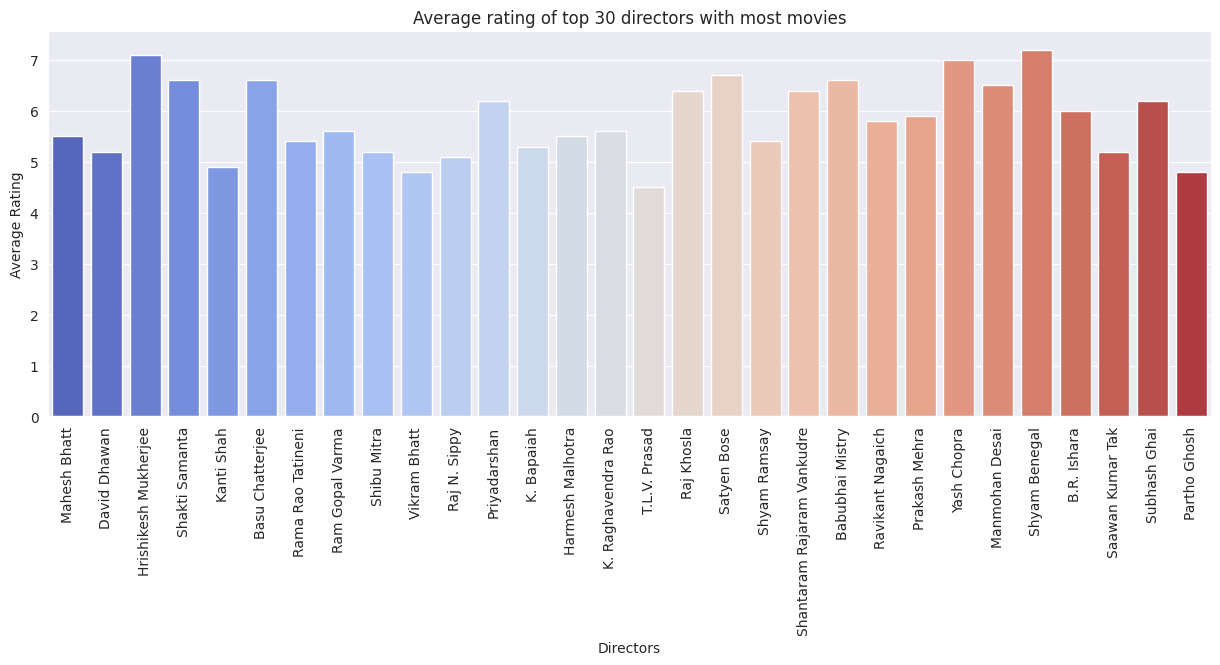

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=directors.head(30),x='Director',y='Average Rating',palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Average rating of top 30 directors with most movies')
plt.show()

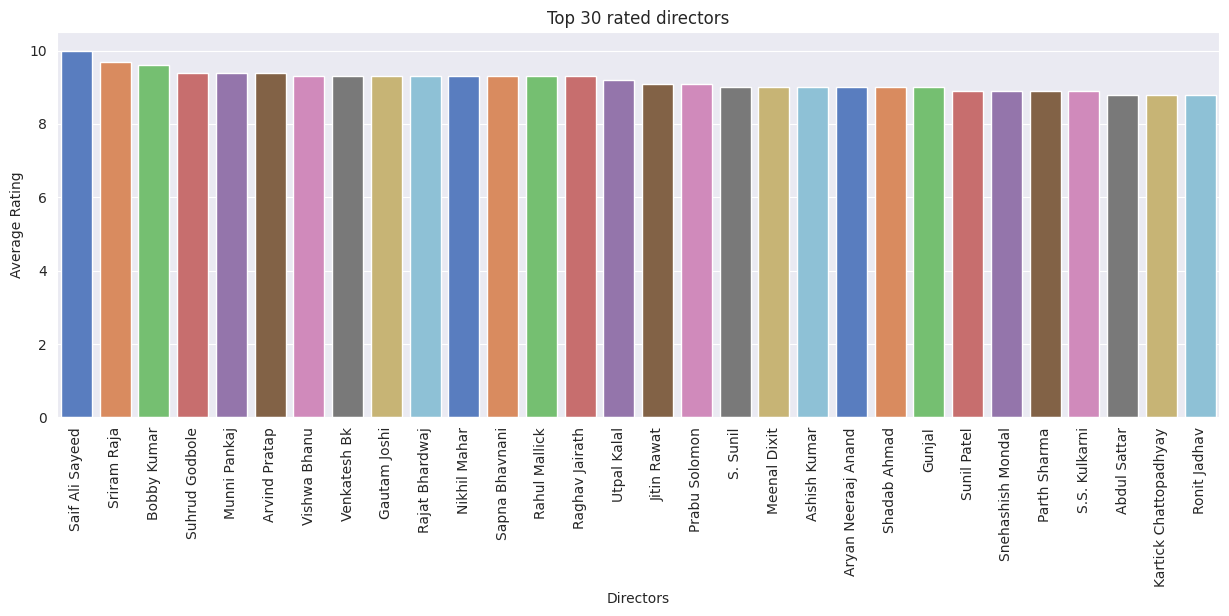

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=directors.sort_values(by='Average Rating',ascending=False).head(30) ,x='Director',y='Average Rating',palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Top 30 rated directors')
plt.show()

In [ ]:
df_melted = df.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores

,Actor,Average Score,Number of movies
2990,Mithun Chakraborty,5.3,231
1395,Dharmendra,5.8,217
2091,Jeetendra,5.4,179
821,Ashok Kumar,6.4,173
425,Amitabh Bachchan,6.2,162
...,...,...,...
2358,Kavitha,4.9,1
2357,Kavita Tripathi,6.8,1
2355,Kavita Kapoor,4.8,1
2354,Kavita Joshi,6.6,1


In [ ]:
actor_score_dict = dict(zip(actor_scores['Actor'], actor_scores['Average Score']))

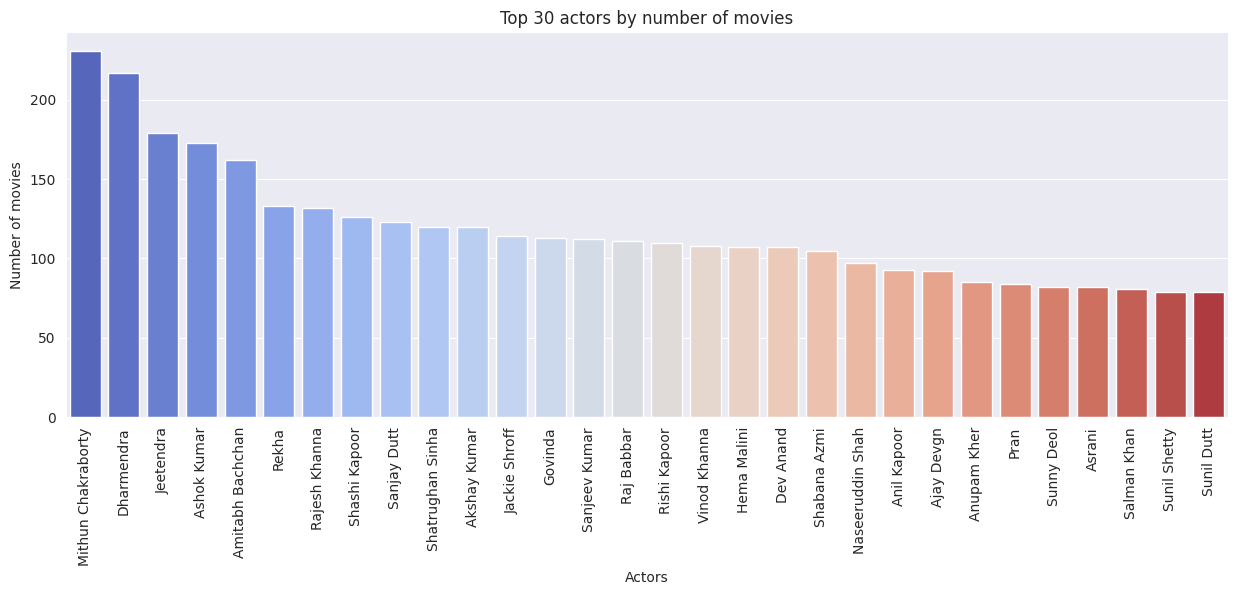

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=actor_scores[:30],x='Actor',y='Number of movies',dodge=False,palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.title('Top 30 actors by number of movies')
plt.show()

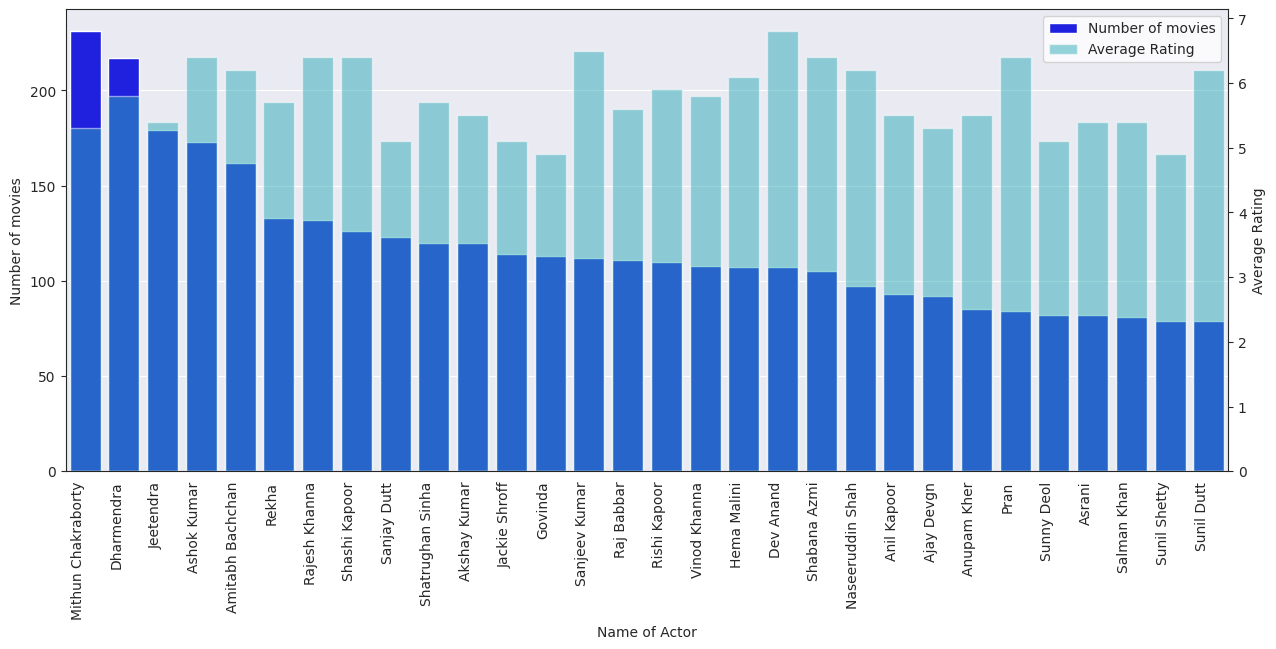

In [ ]:
fig,ax1 = plt.subplots(figsize=(15,6))
sns.set_style('white')
sns.barplot(data=actor_scores[:30],x='Actor',y='Number of movies',dodge=True,ax=ax1,label='Number of movies',color='blue')
ax1.set(xlabel='Name of Actor', ylabel='Number of movies')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(data=actor_scores[:30],x='Actor',y='Average Score',dodge=True,ax=ax2,color='#17becf',label='Average Rating',alpha=0.5)
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [ ]:
actor_scores.sort_values(by='Average Score',ascending=False,inplace=True)

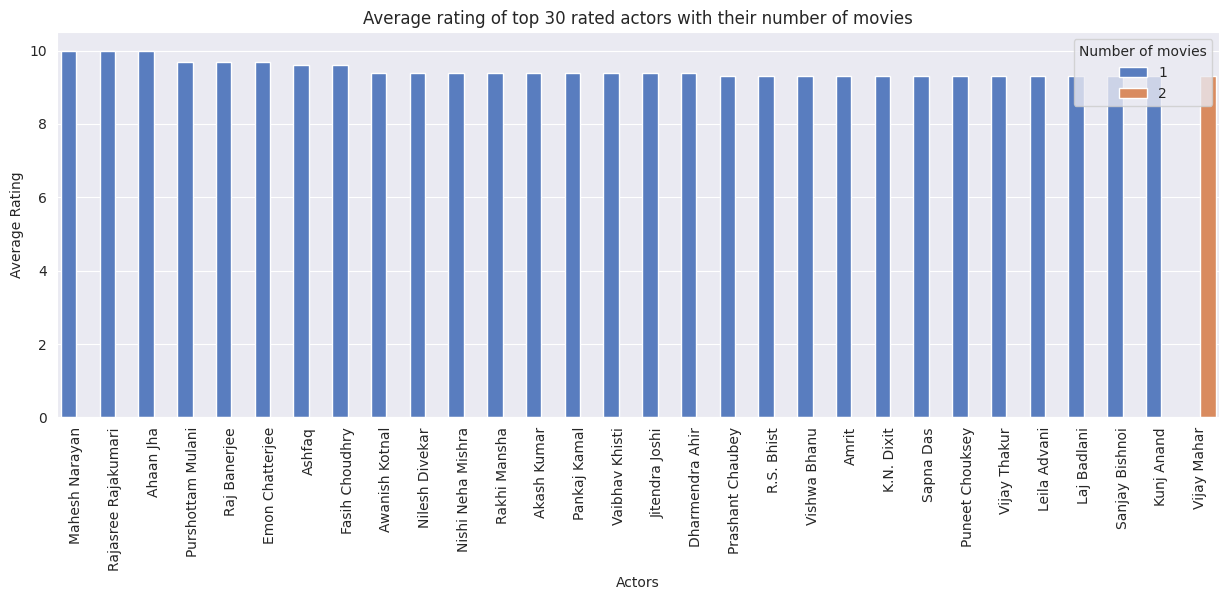

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=actor_scores[:30],x='Actor',y='Average Score',dodge=True,hue='Number of movies',palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Average Rating')
plt.title('Average rating of top 30 rated actors with their number of movies')
plt.show()

Data Preprocessing

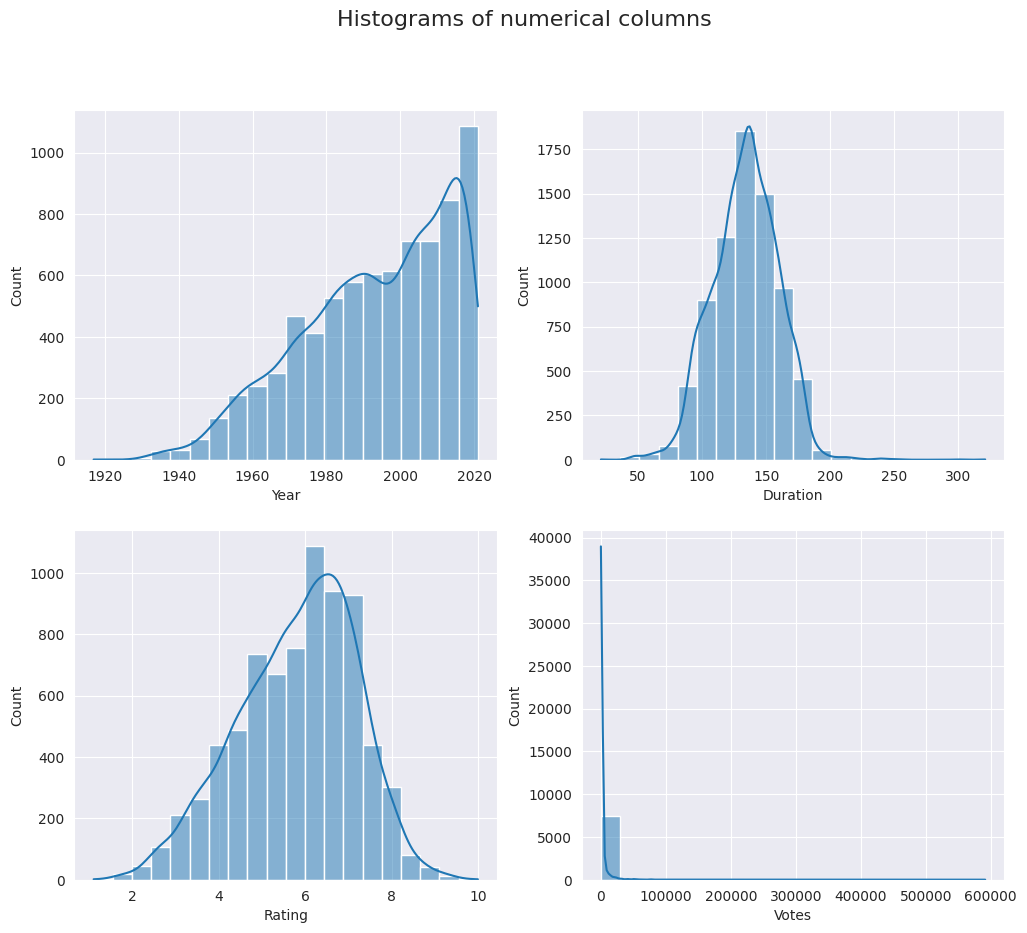

In [ ]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

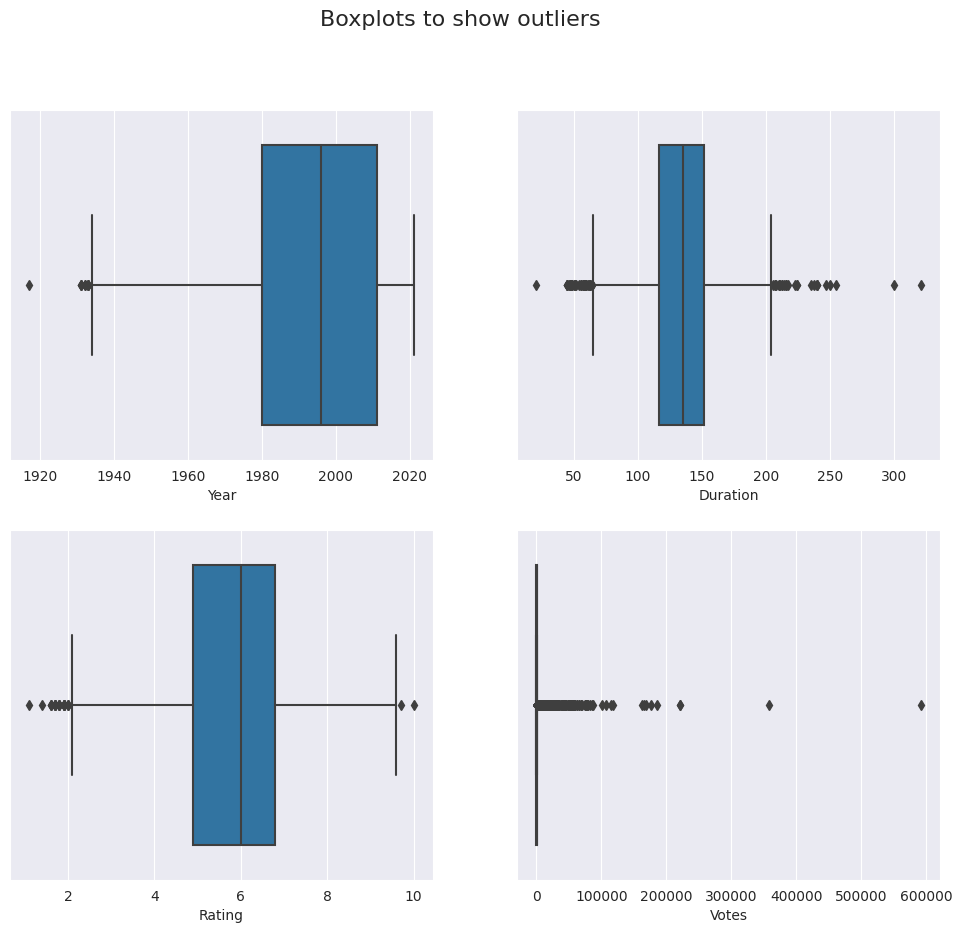

In [ ]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots to show outliers', fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,RobustScaler,PowerTransformer,QuantileTransformer
num_df = df.select_dtypes(include=np.number)
num_df

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326
...,...,...,...,...
15501,1992,120,5.3,135
15503,1989,125,5.8,44
15504,1988,123,4.6,11
15505,1999,129,4.5,655


In [ ]:
pt = PowerTransformer()
num_df_pt = pd.DataFrame(pt.fit_transform(num_df),columns=num_df.columns)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


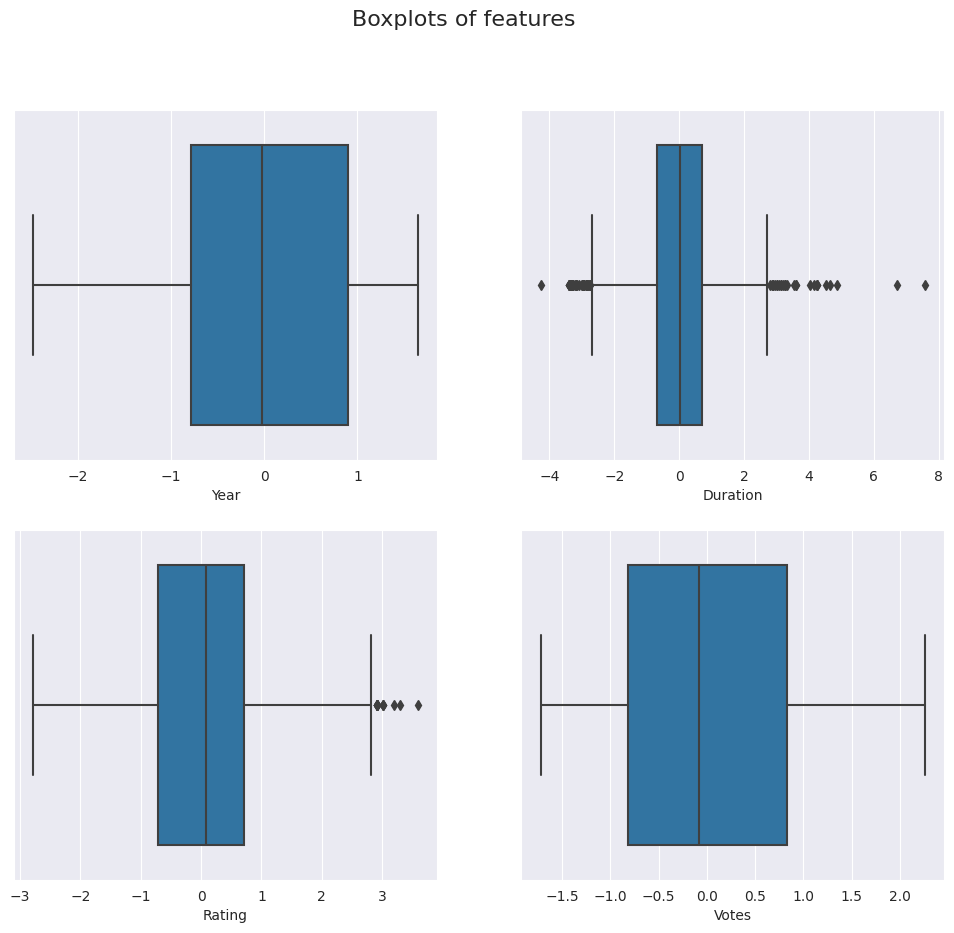

In [ ]:
num_columns = list(num_df_pt.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=num_df_pt,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of features', fontsize=16)
plt.show()

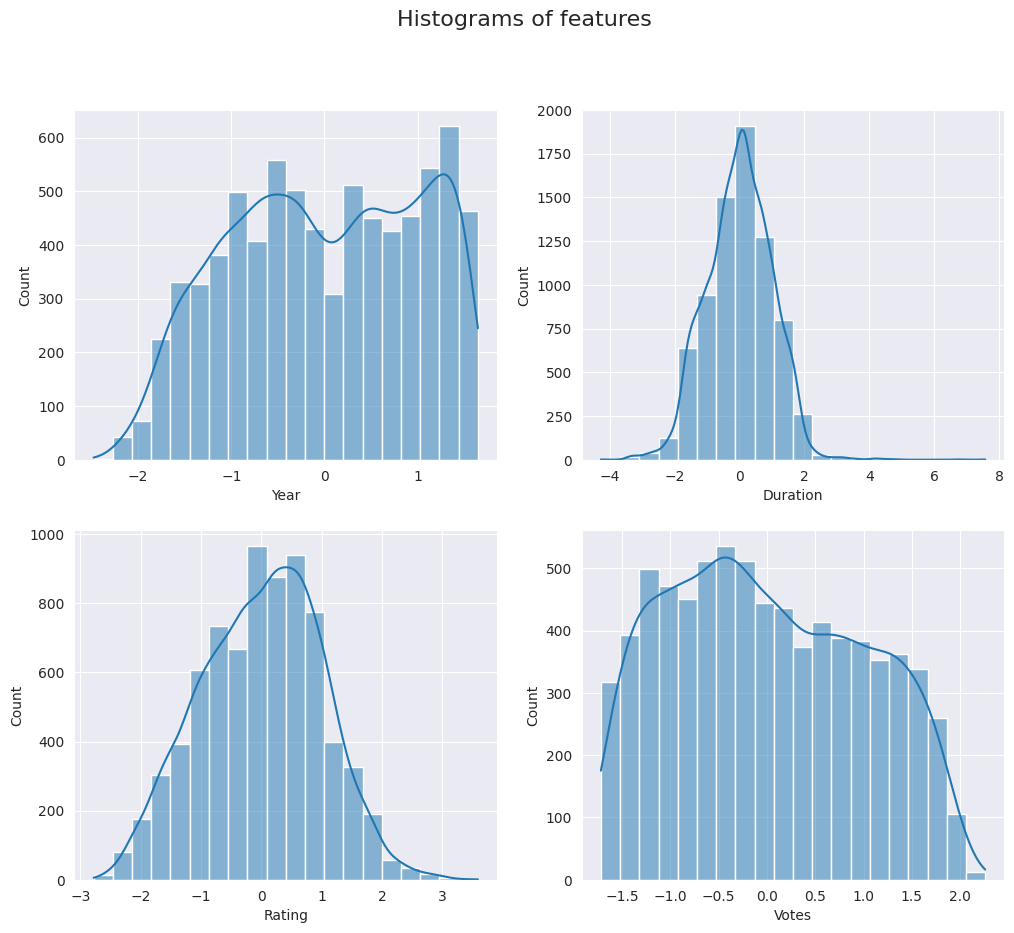

In [ ]:
num_columns = list(num_df_pt.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=num_df_pt,x=num_columns[0],ax=ax[j][i],kde=True,bins=20)
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

In [ ]:
df_2 = df.drop(['Name'],axis=1)
df_2['Genre'] = df_2['Genre'].map(genre_dict)
df_2['Director'] = df_2['Director'].map(directors_dict)
df_2['Actor 1'] = df_2['Actor 1'].map(actor_score_dict)
df_2['Actor 2'] = df_2['Actor 2'].map(actor_score_dict)
df_2['Actor 3'] = df_2['Actor 3'].map(actor_score_dict)
df_2

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,6.3,7.0,8,7.0,6.6,7.0,7.0
3,2019,110,5.7,4.4,35,4.4,5.7,4.4,4.4
5,1997,147,6.2,4.7,827,5.4,4.9,5.9,6.5
6,2005,142,6.8,7.4,1086,7.5,5.6,5.4,6.7
8,2012,82,5.5,5.6,326,5.6,5.6,5.8,5.6
...,...,...,...,...,...,...,...,...,...
15501,1992,120,5.6,5.3,135,5.6,5.8,6.1,4.9
15503,1989,125,5.6,5.8,44,5.9,6.4,6.6,5.7
15504,1988,123,5.0,4.6,11,4.1,6.2,4.1,6.2
15505,1999,129,5.5,4.5,655,5.2,5.5,4.9,5.6


In [ ]:
pt = PowerTransformer()
qt = QuantileTransformer(output_distribution='normal')
df_2[['Rating','Votes','Year']] = pt.fit_transform(df_2[['Rating','Votes','Year']])
df_2[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']] = qt.fit_transform(df_2[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


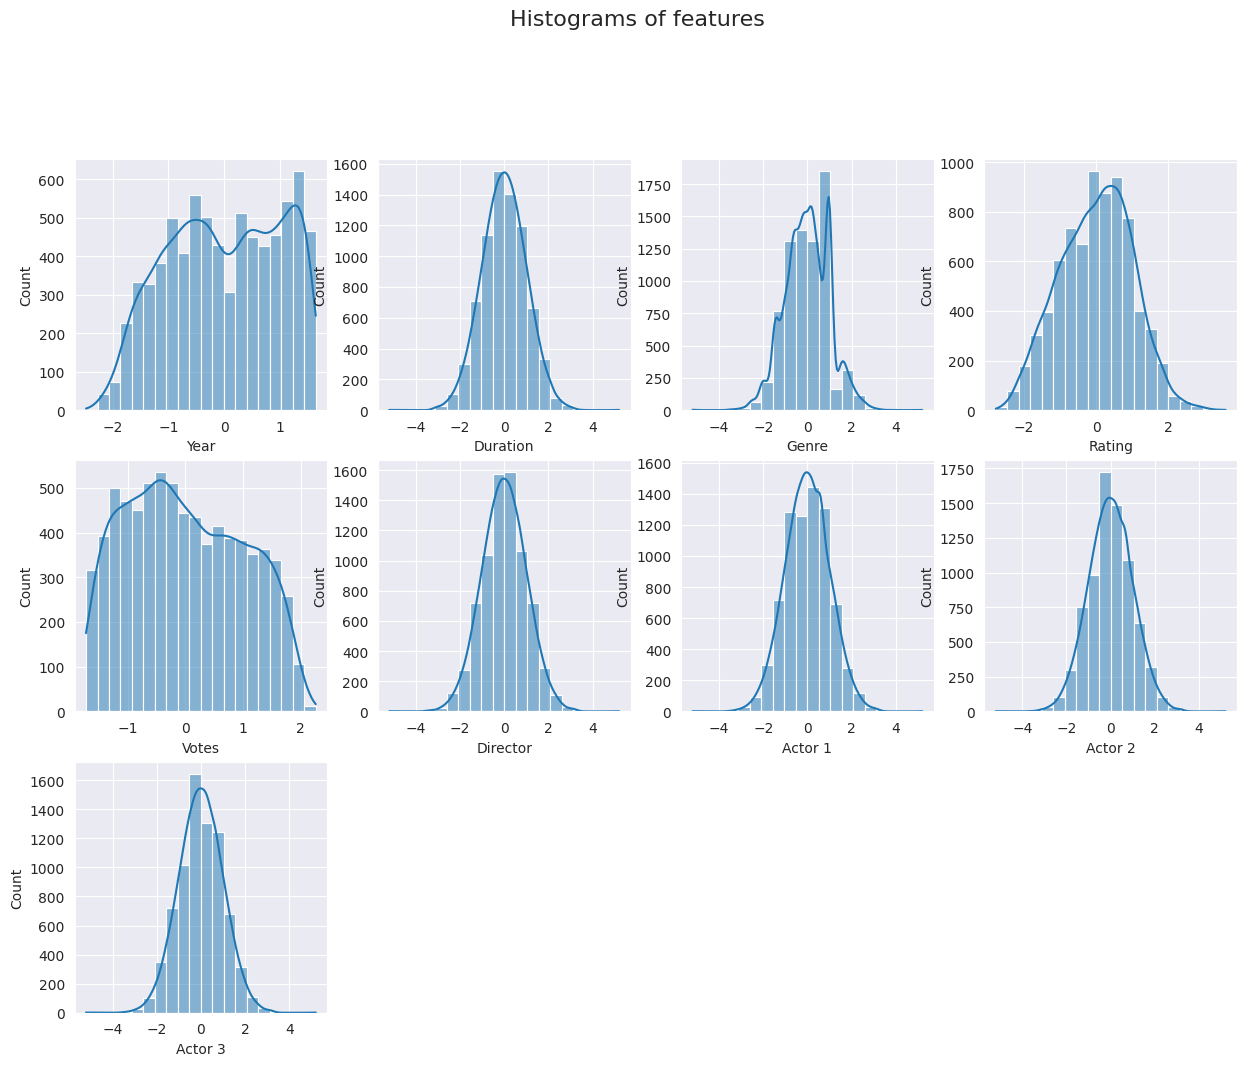

In [ ]:
num_columns = list(df_2.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(15,15))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df_2,x=num_columns[0],ax=ax[j][i],kde=True,bins=20)
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

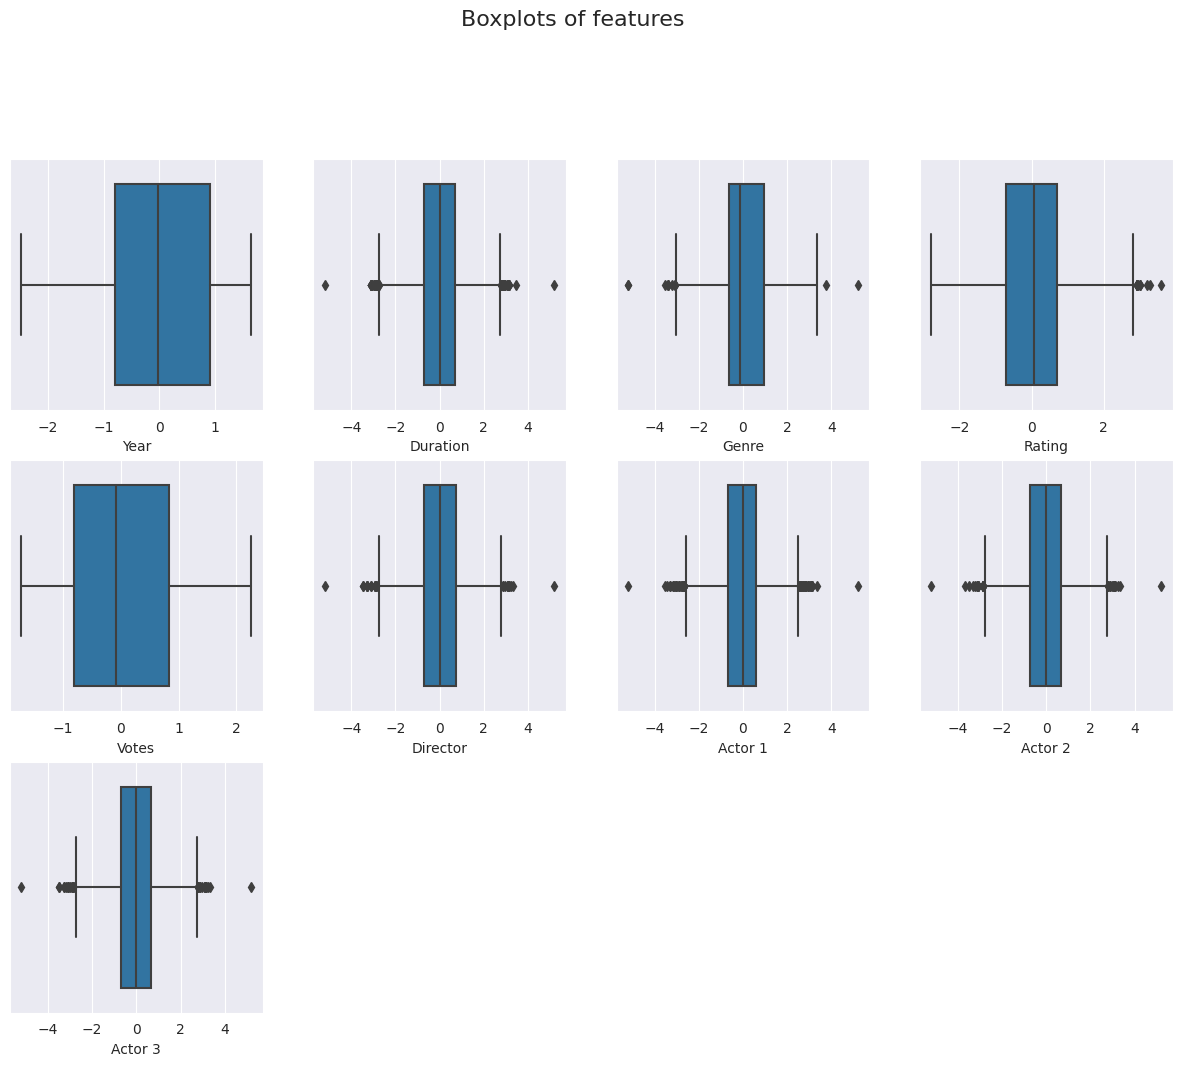

In [ ]:
num_columns = list(df_2.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(15,15))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df_2,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of features', fontsize=16)
plt.show()

In [ ]:
corr_df = df_2.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Director    0.790873
Actor 3     0.688298
Actor 2     0.680154
Actor 1     0.677860
Genre       0.412430
Votes       0.149261
Duration   -0.011186
Year       -0.150249
Name: Rating, dtype: float64

<Axes: >

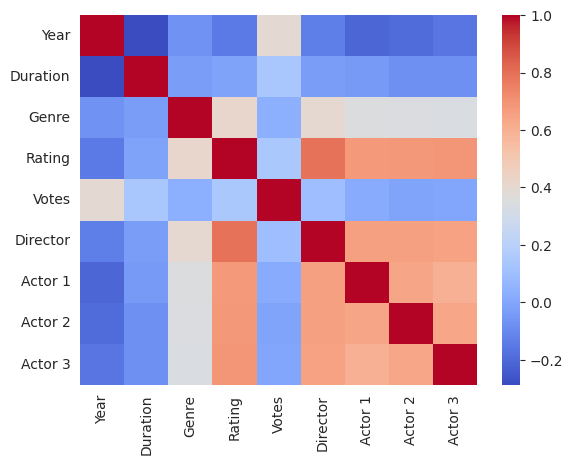

In [ ]:
sns.heatmap(corr_df,annot=False,cmap='coolwarm')

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
X=df_2.drop('Rating',axis=1)
y=df_2['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

Mean squared error:  0.2717117426087693
Mean absolute error:  0.39031862493105945
R2 score:  0.7250116435049292


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
X=df_2.drop('Rating',axis=1)
y=df_2['Rating']
# Assuming X and y are your data and labels
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5)
# print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.01


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    'RandomForestRegressor': RandomForestRegressor()
    # ,'LinearRegression': LinearRegression()
}

# Define the parameters for grid search
params = {
    'RandomForestRegressor': { 'n_estimators': [75,100,125,150], 'max_features': ['sqrt', 'log2'] }
    # ,'LinearRegression': {  }
}

In [ ]:
X = df_2.drop('Rating',axis=1)
y = df_2['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
for model_name, model in models.items():
    model_to_tune = GridSearchCV(model, params[model_name], cv=5)
    model_to_tune.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {model_to_tune.best_params_}")
    print(f"Best score for {model_name}: {model_to_tune.best_score_}")

Best parameters for RandomForestRegressor: {'max_features': 'log2', 'n_estimators': 125}
Best score for RandomForestRegressor: 0.7695138969052915


In [ ]:
X = df_2.drop('Rating',axis=1)
y = df_2['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7,random_state=42)
rf = LinearRegression()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
# print('Mean squared error: ',mean_squared_error(y_test,y_pred))
# print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 scorefor training data: ',r2_score(y_train,y_pred))
print('R2 score for testing data: ',r2_score(y_test,y_pred_test))

R2 scorefor training data:  0.7263354504887971
R2 score for testing data:  0.7250116435049292


So 72.5 is best score for Decision Tree regressor avoiding overfitting